## Environment Setup

In [1]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(2**31)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.5.3
numpy : 1.23.5
matplotlib : 3.7.1
seaborn : 0.12.2
sklearn : 1.2.2
imblearn : 0.10.1


## Load Data

In [2]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
dfkdd_train = pd.read_table(r"C:\Users\rohitha\Documents\KDDTrain.txt", sep=",", names=datacols) # change path to where the dataset is located.
dfkdd_train = dfkdd_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table(r"C:\Users\rohitha\Documents\KDDTest.txt", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1]

In [3]:
dfkdd_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


### Train dataset

In [5]:
# View train data
dfkdd_train.shape

(125973, 42)

In [6]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


In [7]:
dfkdd_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Test dataset

In [8]:
# View test data
dfkdd_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [9]:
dfkdd_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [10]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


## Data Preprocessing

In [11]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [12]:
# Apply attack class mappings to the dataset
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda v: mapping[v])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda v: mapping[v])

In [13]:
# Drop attack field from both train and test data
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [28]:
# View top 3 train data 
dfkdd_train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.0,255,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.0,255,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,DoS
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,Normal


In [32]:
dfkdd_train['flag'].unique()9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Exploratory Data Analysis

In [16]:
# Descriptive statistics
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
dfkdd_train['num_outbound_cmds'].value_counts()
print(dfkdd_train['num_outbound_cmds'].value_counts())

dfkdd_test['num_outbound_cmds'].value_counts()
print(dfkdd_test['num_outbound_cmds'].value_counts())

0    125973
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [18]:
# 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [19]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


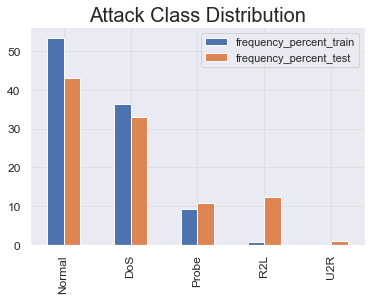

In [20]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [21]:
dfkdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [22]:

dfkdd_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_class'],
      dtype='object')

### Scaling Numerical Attributes

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [33]:
traincat["flag"].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

### Data Sampling

In [44]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = dfkdd_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# reshape target column to 1D array shape  
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


In [45]:
sc_traindf.shape

(125973, 37)

In [46]:
X_res.shape

(336715, 40)

## Randomforest classifier

In [47]:
#for multi class
from sklearn.model_selection import train_test_split


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [49]:
#for multiclass
X_train,X_test,Y_train,Y_test=train_test_split(X_res,y_res,test_size=0.2)

In [50]:
X_train.shape

(269372, 40)

In [51]:
type(X_train)
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(criterion='gini', max_features='auto',random_state=42,max_depth=3)
Rf.fit(X_train, Y_train)


Rf_prediction = Rf.predict(X_test)
Rf_accuracy = accuracy_score(Y_test,Rf_prediction)
print("training accuracy Score    : ",Rf.score(X_train, Y_train))
print("Validation accuracy Score : ",Rf_accuracy )
print(classification_report(Rf_prediction,Y_test))

training accuracy Score    :  0.8750575412440789
Validation accuracy Score :  0.8712709561498597
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10020
           1       0.75      0.89      0.81     11471
           2       0.98      0.73      0.83     18125
           3       0.96      0.86      0.91     14738
           4       0.94      0.97      0.96     12989

    accuracy                           0.87     67343
   macro avg       0.87      0.89      0.87     67343
weighted avg       0.89      0.87      0.87     67343



In [55]:
import joblib

In [57]:

joblib.dump(Rf, r"RF.sav")

['RF.sav']

## Loading the model from pickle file and getting the predictions

In [71]:
# loaded_model = pickle.load(open('Ramdom_forest_model.pkl', 'rb'))

In [72]:
results=[svm.sav]


In [73]:
# float_features = [float(x) for x in results]
features = [np.array(results)]
prediction = RF.predict(features)
prediction

array([1])

In [46]:
print("Predicted values || Actual values")
for i in range(0,len(results)):
    if(int(results[i])==0):
        prediction="Dos"
    else:
        prediction="Probe"
    if(int(Y_test[i])==0):
        actual_val="Dos"
    else:
        actual_val="Probe"

    print(prediction+"         ||    "+actual_val)

Predicted values || Actual values
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos   

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Do

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Do

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Do

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||

Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Do

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe   

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe     

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Do

Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe     

Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe       

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Pr

Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    

Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe       

Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Prob

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         

Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||  

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos   

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos       

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Pr

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||  

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe       

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe 

Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||  

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Pr

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe   

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe 

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe 

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Do

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    

Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||  

Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe     

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Pr

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe   

Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe   

Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Prob

Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe   

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos       

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe   

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe   

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos


Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe       

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    

Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe       

Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe 

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos


Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Pr

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Prob

Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos 

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe 

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||  

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||  

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||

Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe       

Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe     

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Prob

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe       

Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe 

Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Prob

Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Dos         ||    Dos
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Probe
Probe         ||    Pr

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.1, penalty='l2',max_iter=3)

LR.fit(X_train, Y_train)

LR_prediction = LR.predict(X_test)
LR_accuracy = accuracy_score(Y_test,LR_prediction)
print("training accuracy Score    : ",LR.score(X_train, Y_train))
print("Validation accuracy Score : ",LR_accuracy )
print(classification_report(LR_prediction,Y_test))

training accuracy Score    :  0.5997468185260532
Validation accuracy Score :  0.6014879052017285
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     14678
           1       0.75      0.38      0.50     27041
           2       0.61      0.57      0.59     14348
           3       0.31      0.94      0.47      4424
           4       0.50      0.98      0.66      6852

    accuracy                           0.60     67343
   macro avg       0.60      0.73      0.60     67343
weighted avg       0.68      0.60      0.60     67343



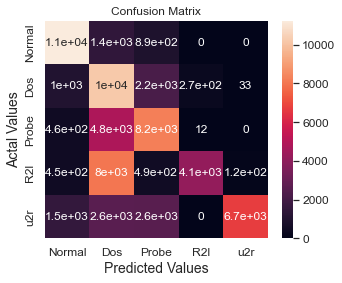

In [59]:
cm = confusion_matrix(Y_test, LR_prediction)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


## Exporting the model to pickle file

In [60]:
joblib.dump(LR, "LR.sav")

['LR.sav']

# KNN classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
k_acc=accuracy_score(Y_test,y_pred)
print("training accuracy Score    : ",classifier.score(X_train, Y_train))
print("Validation accuracy Score : ",k_acc )
print(classification_report(y_pred,Y_test))

training accuracy Score    :  0.9991090388013601
Validation accuracy Score :  0.9989011478550109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13432
           1       1.00      1.00      1.00     13333
           2       1.00      1.00      1.00     13727
           3       1.00      1.00      1.00     13295
           4       1.00      1.00      1.00     13556

    accuracy                           1.00     67343
   macro avg       1.00      1.00      1.00     67343
weighted avg       1.00      1.00      1.00     67343



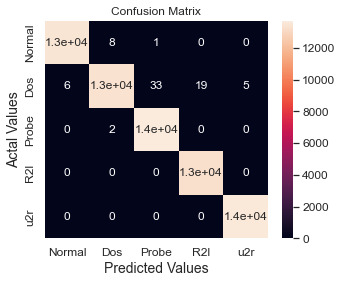

In [50]:
cm = confusion_matrix(Y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [56]:
joblib.dump(classifier, "KNN.sav")

['KNN.sav']

# Support Vector Machine

In [52]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, Y_train)
svrprediction = sv.predict(X_test)
svraccuracy = accuracy_score(Y_test,svrprediction)
print("training accuracy Score    : ",sv.score(X_train, Y_train))
print("Validation accuracy Score : ",svraccuracy )
print(classification_report(svrprediction,Y_test))

training accuracy Score    :  0.9458481208143386
Validation accuracy Score :  0.9459038058892535
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13208
           1       0.93      0.95      0.94     13158
           2       0.98      0.99      0.98     13562
           3       0.98      0.85      0.91     15312
           4       0.86      0.97      0.91     12103

    accuracy                           0.95     67343
   macro avg       0.95      0.95      0.95     67343
weighted avg       0.95      0.95      0.95     67343



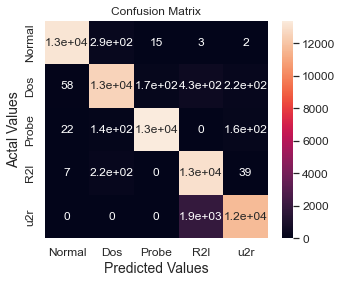

In [53]:
cm = confusion_matrix(Y_test, svrprediction)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [57]:
joblib.dump(sv, "svm.sav")

['svm.sav']

# Confusion Matrix

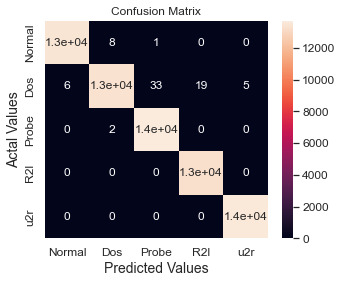

In [54]:
cm = confusion_matrix(Y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


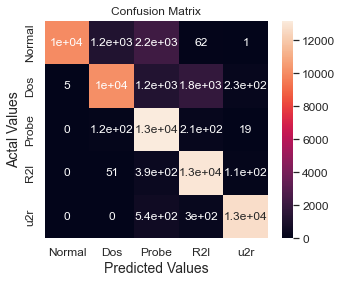

In [38]:
cm = confusion_matrix(Y_test, Rf_prediction)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


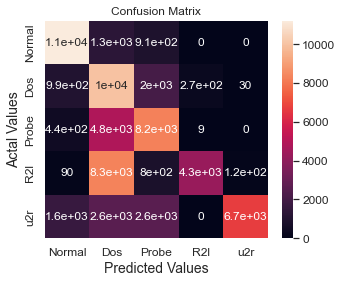

In [39]:
cm = confusion_matrix(Y_test, LR_prediction)
cm_df = pd.DataFrame(cm,
                     index = ['Normal','Dos','Probe','R2l','u2r'], 
                     columns = ['Normal','Dos','Probe','R2l','u2r'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [2]:
import pickle


model = pickle.load(open('Ramdom_forest_model.pkl', 'rb'))

***Assessment Questions***

- **Explain how you would handle missing data in a given dataset and provide a code snippet demonstrating this**


Handling missing data is an important step in data preprocessing to ensure accurate and reliable analysis. There are several approaches to deal with missing data, such as removing rows or columns with missing values, imputing missing values with statistical measures, or using advanced techniques like machine learning algorithms to predict missing values. 
I'll explain one common approach, which is imputing missing values using the mean or median.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('your_dataset.csv')

# Check for missing values
print(df.isnull().sum())

# Impute missing values with mean
df_filled = df.fillna(df.mean())

# Check if any missing values are remaining
print(df_filled.isnull().sum())

# Save the imputed dataset to a new CSV file
df_filled.to_csv('imputed_dataset.csv', index=False)


In the code snippet above, we start by loading the dataset using the read_csv() function from the pandas library. We then use the isnull() function to check for missing values in the dataset. The isnull().sum() command prints the count of missing values in each column.

To impute missing values, we use the fillna() method from pandas. In this example, we fill the missing values with the mean of each column, which is calculated using the mean() method. You can also replace the mean with the median or any other statistical measure that suits your dataset.

After imputing the missing values, we again check for any remaining missing values using isnull().sum(). If there are still missing values, you may consider applying other imputation techniques or further investigate the cause of missingness.

Finally, we save the imputed dataset to a new CSV file using the to_csv() method. The index=False parameter is used to exclude the row index from the saved file.

Note that this is just one way to handle missing data, and the choice of technique depends on the nature and characteristics of your dataset.

- **Prepare a high-level lesson plan for an introductory session on deep learning.**

Lesson Plan: Introduction to Deep Learning

Duration: 90 minutes

Objective:
- Provide an overview of deep learning and its applications
- Explain the basic concepts and components of deep learning
- Introduce popular deep learning architectures
- Discuss practical considerations and resources for getting started with deep learning

Lesson Outline:

I. Introduction to Deep Learning (15 minutes)
   - Definition and significance of deep learning
   - Applications of deep learning in various domains
   - Key differences between deep learning and traditional machine learning

II. Basic Concepts of Deep Learning (30 minutes)
   - Neural networks: neurons, activation functions, and layers
   - Deep learning architectures: feedforward neural networks, convolutional neural networks, recurrent neural networks
   - Backpropagation algorithm and gradient descent optimization
   - Overfitting and regularization techniques

III. Popular Deep Learning Architectures (30 minutes)
   - Feedforward Neural Networks (Multilayer Perceptron)
   - Convolutional Neural Networks (CNNs) for image recognition
   - Recurrent Neural Networks (RNNs) for sequential data analysis
   - Generative Adversarial Networks (GANs) for generating new content
   - Transformer-based architectures for natural language processing

IV. Practical Considerations and Resources (15 minutes)
   - Deep learning frameworks (e.g., TensorFlow, PyTorch)
   - Hardware considerations (GPUs, TPUs)
   - Datasets and data preprocessing
   - Online resources, tutorials, and courses for learning deep learning
   - Best practices for model training, evaluation, and deployment

V. Q&A and Wrap-up (15 minutes)
   - Addressing questions and clarifications
   - Summarizing key takeaways from the session
   - Encouraging further exploration and self-study in deep learning

Note: The duration of each section is flexible and can be adjusted based on the audience's level of familiarity with the topic and their engagement. Additionally, including demonstrations, hands-on exercises, or interactive activities can enhance the learning experience and make the session more engaging.

- **How would you troubleshoot a machine learning model whose performance isn't as expected? Discuss your approach briefly**

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on enabling computers to understand and process human language in a way that is similar to how humans do. It involves developing algorithms and models that allow computers to interpret and generate human language.

In simpler terms, NLP helps computers understand and work with human language, just like we humans do. It involves tasks such as understanding the meaning of sentences, extracting important information from text, translating between languages, and even generating human-like responses.

NLP has numerous real-world applications across various industries:

Chatbots and Virtual Assistants: NLP powers chatbots and virtual assistants, allowing them to understand and respond to user queries, provide information, and offer customer support.

Sentiment Analysis: NLP can analyze social media posts, customer reviews, and feedback to determine the sentiment behind them. This helps companies understand customer opinions, assess brand reputation, and make data-driven decisions.

Language Translation: NLP is used for machine translation, enabling software like Google Translate to automatically translate text or speech from one language to another.

Text Summarization: NLP algorithms can summarize large amounts of text by extracting the most important information, making it easier and quicker for users to understand lengthy documents.

Information Extraction: NLP techniques can extract structured information from unstructured text, such as extracting names, dates, locations, and other relevant data from documents or news articles.

Speech Recognition: NLP is behind speech recognition systems like Siri or Google Assistant, which convert spoken words into text, enabling hands-free control of devices and applications.

Spam Detection: NLP helps in identifying and filtering spam emails or messages by analyzing the content, language patterns, and other characteristics associated with spam.

Question Answering Systems: NLP is used to build question answering systems that can understand user queries and provide relevant answers from a large corpus of text or knowledge base.

Personalized Recommendations: NLP algorithms analyze user behavior, preferences, and textual data to provide personalized recommendations in various domains like e-commerce, entertainment, or content platforms.

Healthcare Applications: NLP is used to process medical records, extract relevant information, and assist in clinical decision-making, diagnosis, and medical research.


These are just a few examples of how NLP is applied in real-world scenarios. NLP continues to advance and has a significant impact on various industries, making computers more capable of understanding and working with human language.

- **Write a SQL query to retrieve specific information from a relational database. The schema will be provided**

In [ ]:
SELECT column1, column2
FROM table_name
WHERE condition;